## Exercise 1

In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt

in_dir = "data/"

# X-ray image
im_name = "vertebra.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)
print(im_org.dtype)

(998, 800)
uint8


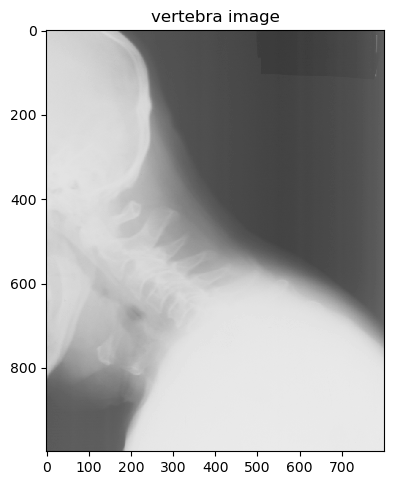

In [2]:
io.imshow(im_org)
plt.title('vertebra image')
io.show()

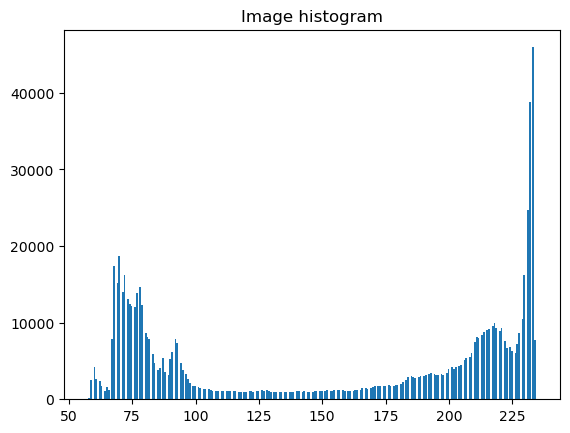

In [5]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

## Exercise 2

In [6]:
min(im_org.ravel()), max(im_org.ravel())

(57, 235)

## Exercise 3

0.22352941176470587 0.9215686274509803
0.2235294117647059 0.9215686274509803


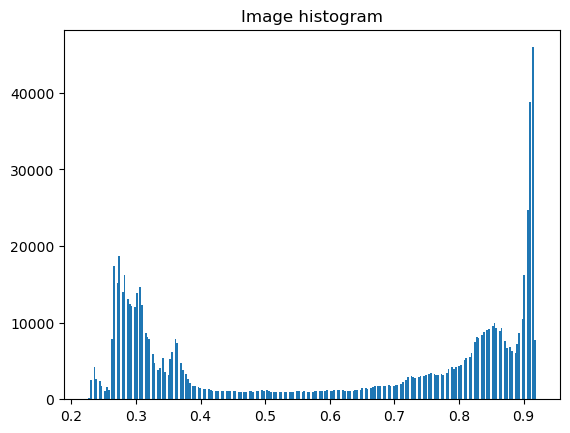

In [11]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

im_float = img_as_float(im_org)


print(min(im_float.ravel()), max(im_float.ravel()))
print(57/255, 235/255)
plt.hist(im_float.ravel(), bins=256)
plt.title('Image histogram')
io.show()

## Exercise 4

In [13]:
im_ubyte = img_as_ubyte(im_float)
print(min(im_ubyte.ravel()), max(im_ubyte.ravel()))


57 235


## Exercise 5

In [14]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out = (img_float - min_val) / (max_val - min_val) * (max_desired - min_desired) + min_desired

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

## Exercise 6

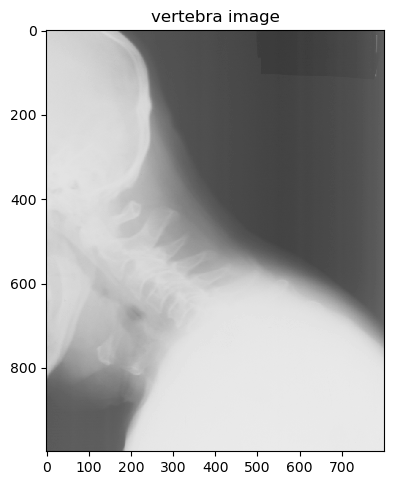

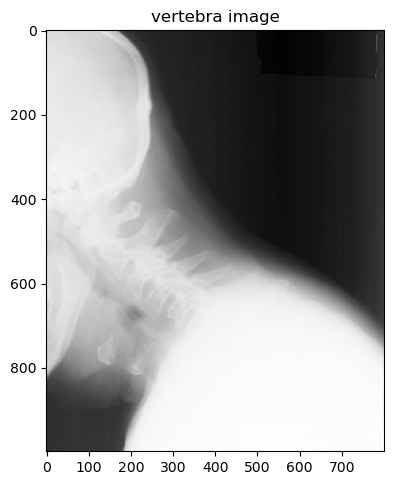

In [15]:
io.imshow(im_org)
plt.title('vertebra image')
io.show()

io.imshow(histogram_stretch(im_org))
plt.title('vertebra image')
io.show()

## Exercise 7

In [22]:
def gamma_map(im_in):
    """
    Create a gamma map
    :return: Gamma map
    """
    im_in = img_as_float(im_in)
    gamma = 3
    im_out = im_in ** gamma
    im_out = img_as_ubyte(im_out)
    return im_out

## Exercise 8

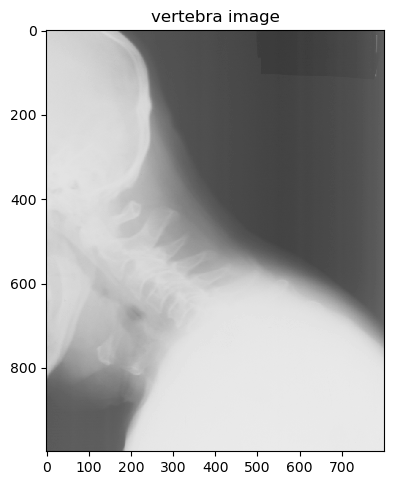

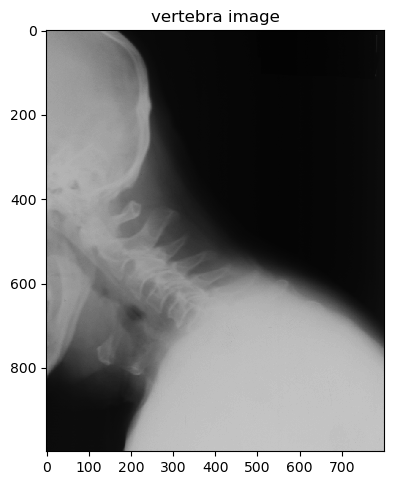

In [24]:
io.imshow(im_org)
plt.title('vertebra image')
io.show()

io.imshow(gamma_map(im_org))
plt.title('vertebra image')
io.show()

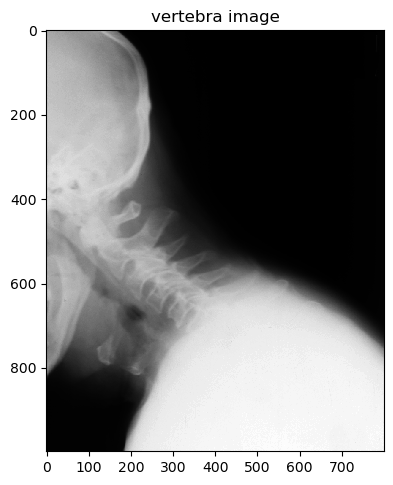

In [27]:
io.imshow(gamma_map(histogram_stretch(im_org)))
plt.title('vertebra image')
io.show()

## Exercise 9

In [28]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """

    img_in = img_as_float(img_in)
    img_out = img_in > (thres/255)
    img_out = img_as_ubyte(img_out)
    return img_out

## Exercise 10

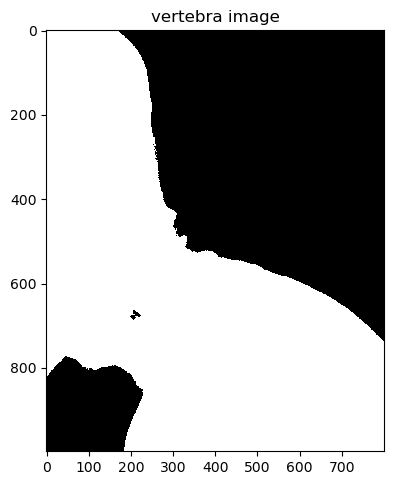

In [33]:
io.imshow(threshold_image(im_org,155))
plt.title('vertebra image')
io.show()

## Exercise 11

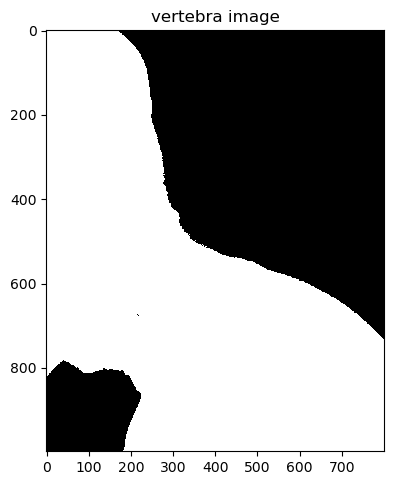

In [42]:

from skimage.filters import threshold_otsu
def otsu_threshold(img_in):
    """
    Apply Otsu's thresholding to an image
    :param img_in: Input image
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    img_in = img_as_float(img_in)
    thres = threshold_otsu(img_in)
    img_out = img_in > thres
    img_out = img_as_ubyte(img_out)
    return img_out

io.imshow(otsu_threshold(im_org))
plt.title('vertebra image')
io.show()

## Exercise 12

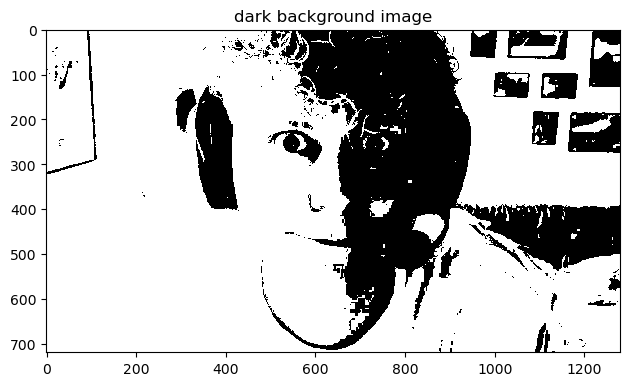

In [64]:
import numpy as np

in_dir = "data/"

# X-ray image
im_name = "rasmus.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_dark = io.imread(in_dir + im_name)

im_dark = color.rgb2gray(im_dark)
im_dark = img_as_ubyte(im_dark)


io.imshow(threshold_image(im_dark,85))
plt.title('dark background image')
io.show()

## Exercise 13

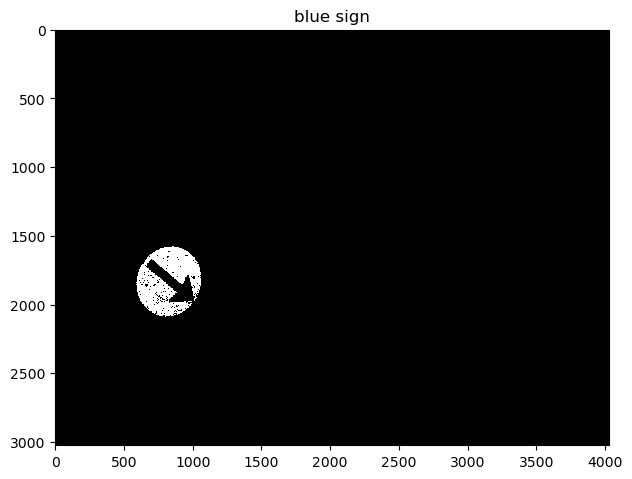

In [67]:
in_dir = "data/"

# X-ray image
im_name = "DTUSigns2.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_sign= io.imread(in_dir + im_name)
def detect_dtu_signs_blue(im_org):
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    return segm_blue

io.imshow(detect_dtu_signs_blue(im_sign))
plt.title('blue sign')
io.show()

## Exercise 14

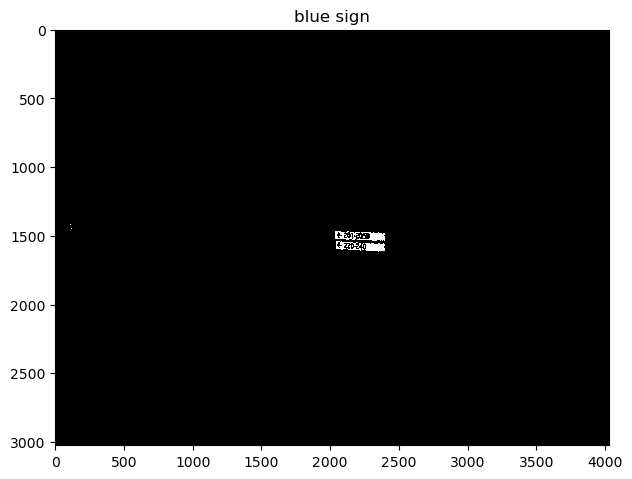

In [77]:
def detect_dtu_signs(im_org, color):
    
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    if color == 'blue':
        segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    elif color == 'red':
        segm = (r_comp > 160) & (g_comp < 100) & (b_comp < 100)
    elif color == 'green':
        segm = (r_comp < 50) & (g_comp > 200) & (b_comp < 50)
    return segm

io.imshow(detect_dtu_signs(im_sign, 'red'))
plt.title('red sign')
io.show()

## Exercise 15

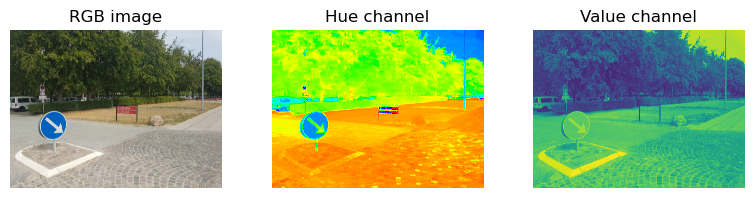

In [78]:
hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

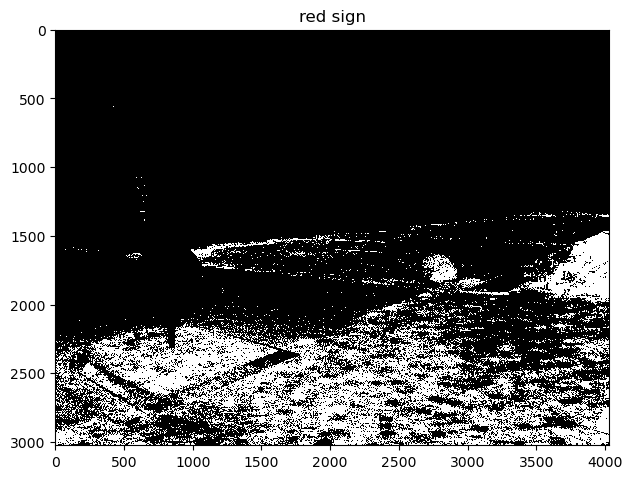

In [90]:
# Now make a sign segmentation function using tresholding in HSV space and locate both the blue and the red sign.
def detect_dtu_signs(im_org, col):
    hsv_img = color.rgb2hsv(im_org)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    if col == 'blue':
        segm = (hue_img < 0.6) & (hue_img > 0.5) & (value_img > 0.7)
    elif col == 'red':
        segm = (hue_img < 0.1) & (hue_img > 0.05) & (value_img > 0.5)
    return segm

io.imshow(detect_dtu_signs(im_sign, 'red'))
plt.title('red sign')
io.show()
